# Coordenadas cromáticas

Para resolver el pasaje de las imágenes al plano (1,1,1), es decir, a sus coordenadas cromáticas, levantamos las imágenes de Drive para luego aplicar el algoritmo:
R_cc = R / (R + G + B).
Analogamente con el resto de los canales.
De esta forma obtenemos un predictor independiente de los cambios de contraste.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

In [ ]:
def carga_imagen(img):
    imagen = cv2.imread('/content/drive/MyDrive/CV I/Imágenes TPs/TP1/' + img)
    imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    return imagen

In [ ]:
img1 = carga_imagen('CoordCrom_1.png')
img2 = carga_imagen('CoordCrom_2.png')
img3 = carga_imagen('CoordCrom_3.png')

In [ ]:
def coord_crom(img):
  # leo BGR como float para hacer las sumas.
    bgr = np.array(cv2.split(img), dtype='float')
    Z=np.sum(bgr, axis=0)
  # reemplazo los valores nulos de Z (que sería R=G=B=0) por 1, en definitiva es para asignarle coordenadas cromáticas (0,0,0) a lo que sea negro
    Z[Z==0] = 1
    for i in range(bgr.shape[0]):
        bgr[i] = bgr[i]/Z

    return bgr

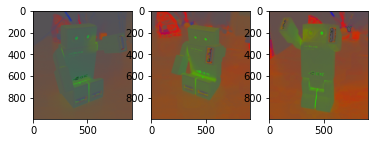

In [ ]:
imgs=[img1, img2, img3]
fig, ax = plt.subplots(1, 3)
i = 0
for img in imgs:
    img_nueva = np.uint8(cv2.merge(coord_crom(img))*255)
    ax[i].imshow(img_nueva)
    i+=1

# White patch

Para resolver el algoritmo de White patch, calculamos un percentil (preferentemente elevado, pero no 100) de cada canal dentro de la imagen. Luego, multiplicamos a cada canal de la imagen por 255/(valor_percentil), con tope en 255. 
Le aplicamos el algoritmo a las imágenes con percentil 95.

In [ ]:
img4 = carga_imagen('WP_B.png')
img5 = carga_imagen('WP_O.png')
img6 = carga_imagen('WP_R.png')

In [ ]:
def white_patch(img, percentil):
    bgr = np.array(cv2.split(img))
    for i in range(bgr.shape[0]):
        max = np.percentile(bgr[i], percentil)
        bgr[i] = cv2.multiply(bgr[i],255/max)
    return cv2.merge((bgr[2], bgr[1], bgr[0]))

Corremos para cada imagen con percentil 90.

Imagen original:


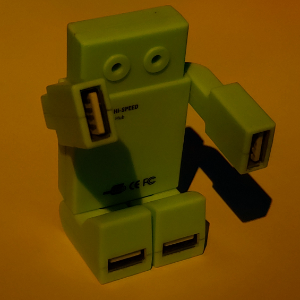

Imagen con algoritmo White Patch:


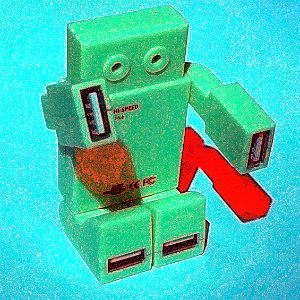

Imagen original:


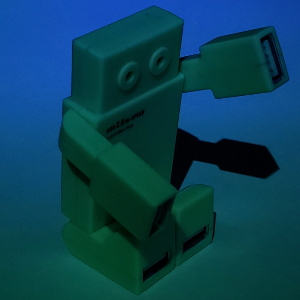

Imagen con algoritmo White Patch:


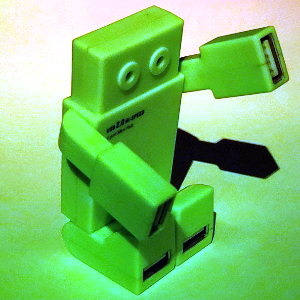

Imagen original:


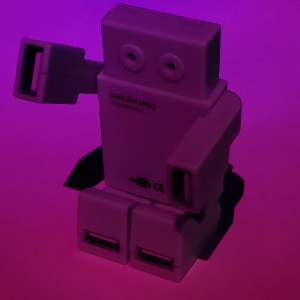

Imagen con algoritmo White Patch:


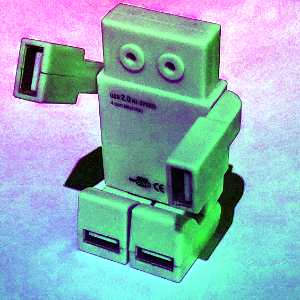

In [ ]:
percentil = 90
for imagen in [img4, img5, img6]:
    print("Imagen original:")
    cv2_imshow(cv2.resize(imagen, (300, 300)))
    print("Imagen con algoritmo White Patch:")
    cv2_imshow(cv2.resize(white_patch(imagen, percentil), (300,300)))